# Regresión lineal

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets, linear_model #datasets y modelos de aprendizaje automático (ML)
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from scipy import stats #para poder hacer cálculos científicos --> valores p
import statsmodels.api as sm

## Preparación de los datos

Vamos a cargar en un **dataframe** de ***pandas*** el datset "ResidentialBuiliding" que se encuentra en un archivo EXCEL.

In [2]:
data = pd.read_excel("02_ResidentialBuilding.xlsx")

In [3]:
print(data.shape)
data.head()

(372, 8)


,zipcode,total_floor_area,lot_area,total_cost_preliminary_estimation,duration_construction,price_unit_begining_project,total_population,actual_construction_cost
0,1,3150.0,920.0,598.5,16,1200,41407.0,410
1,1,7600.0,1140.0,3040.0,23,2900,44835.0,1000
2,1,4800.0,840.0,480.0,15,630,37933.0,170
3,1,685.0,202.0,13.7,4,140,8194.0,30
4,1,3000.0,800.0,1230.0,13,5000,48260.0,700


Hay 372 registros con 8 variables.
Vamos a analizar si hay problemas de datos con respecto a valores faltantes y outliers

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
zipcode,372.0,9.728495,6.563309,1.0,4.0,8.00,17.00,20.0
total_floor_area,372.0,1729.044355,1802.371491,200.0,720.0,1220.00,2100.00,15670.0
lot_area,372.0,426.114247,490.076498,60.0,190.0,300.00,490.50,5000.0
total_cost_preliminary_estimation,372.0,327.904086,563.544337,3.7,67.8,164.70,366.05,7208.2
duration_construction,372.0,6.266129,2.096495,2.0,5.0,6.00,7.00,23.0
price_unit_begining_project,372.0,1088.118280,995.826172,40.0,440.0,805.00,1300.00,5700.0
total_population,372.0,27551.883065,13516.283345,8194.0,12065.0,25758.75,40234.00,49572.0
actual_construction_cost,372.0,232.647849,162.627656,20.0,110.0,190.00,330.00,1000.0


No hay problemas de valores faltantes.
Sin embargo, el zipcode se está considerando como un dato numérico, cuando en realidad es un dato categórico que utiliza una codificación numérica par diferenciar diferentes zonas de la ciudad.

In [5]:
data.zipcode = data.zipcode.astype(str)
data.columns
data.describe(include='all')

,zipcode,total_floor_area,lot_area,total_cost_preliminary_estimation,duration_construction,price_unit_begining_project,total_population,actual_construction_cost
count,372,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1729.044355,426.114247,327.904086,6.266129,1088.118280,27551.883065,232.647849
std,NaN,1802.371491,490.076498,563.544337,2.096495,995.826172,13516.283345,162.627656
min,NaN,200.000000,60.000000,3.700000,2.000000,40.000000,8194.000000,20.000000
25%,NaN,720.000000,190.000000,67.800000,5.000000,440.000000,12065.000000,110.000000
50%,NaN,1220.000000,300.000000,164.700000,6.000000,805.000000,25758.750000,190.000000
75%,NaN,2100.000000,490.500000,366.050000,7.000000,1300.000000,40234.000000,330.000000


Es necesario crear variables dummy para cada uno de sus 20 valores.

In [6]:
dummyCols=pd.get_dummies(data.zipcode)
dummyCols.head()

,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dummyCols=pd.get_dummies(data.zipcode)
del data['zipcode']

In [8]:
dummyCols.columns = 'zip_' + dummyCols.columns
dummyCols.columns

Index(['zip_1', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15',
       'zip_16', 'zip_17', 'zip_18', 'zip_19', 'zip_2', 'zip_20', 'zip_3',
       'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8', 'zip_9'],
      dtype='object')

In [9]:
data = data.join(dummyCols)

In [10]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
total_floor_area,372.0,1729.044355,1802.371491,200.0,720.0,1220.00,2100.00,15670.0
lot_area,372.0,426.114247,490.076498,60.0,190.0,300.00,490.50,5000.0
total_cost_preliminary_estimation,372.0,327.904086,563.544337,3.7,67.8,164.70,366.05,7208.2
duration_construction,372.0,6.266129,2.096495,2.0,5.0,6.00,7.00,23.0
price_unit_begining_project,372.0,1088.118280,995.826172,40.0,440.0,805.00,1300.00,5700.0
total_population,372.0,27551.883065,13516.283345,8194.0,12065.0,25758.75,40234.00,49572.0
actual_construction_cost,372.0,232.647849,162.627656,20.0,110.0,190.00,330.00,1000.0
zip_1,372.0,0.080645,0.272656,0.0,0.0,0.00,0.00,1.0
zip_10,372.0,0.018817,0.136062,0.0,0.0,0.00,0.00,1.0
zip_11,372.0,0.010753,0.103275,0.0,0.0,0.00,0.00,1.0


# Aprendizaje del modelo de regresión - Evaluación sobre el conjunto de datos de entrenamiento

Vamos a crear un modelo de regresión lineal que permita obtener *actual_construction_cost* a partir de algunas de las demás variables independientes del dataset.

In [11]:
indep_vars = data.columns
indep_vars = indep_vars.drop('actual_construction_cost')
dep_vars = ['actual_construction_cost']

In [12]:
indep_vars = list(indep_vars)
X = data[indep_vars]
y = data[dep_vars]

Tenemos un dataframe con los datos de las variables independientes y otro con los de la variables dependiente.

Vamos ahora a partir cada dataframe en 2 de manera aleatoria: 67% de los datos se utilizarán para aprender el modelo, y 33 para evaluarlo.

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(249, 26)
(249, 1)
(123, 26)
(123, 1)


Ya tenemos todos los datos preparados para lanzar el modelo de regresión lineal a partir de los datos de entrenamiento.
Lanzamos el método **fit** que se encarga de encontrar la mejor línea de ajuste, y consultamos los diferentes coeficientes encontrados para las variables independientes.

In [15]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Se estableció que se va a utilizar un modelo de regresión lineal, que por defecto incluye un coeficiente para la interceptación de la ordenada en el origen, y que normaliza los datos de las variables predictivas.

In [16]:
for var, coef in zip(indep_vars, np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

total_floor_area: -0.03478021807947818
lot_area: 0.03778165709311816
total_cost_preliminary_estimation: 0.19536838181363722
duration_construction: 15.723836871000296
price_unit_begining_project: 0.1031244251694558
total_population: 0.0005264628397030338
zip_1: -768343505577848.4
zip_10: -768343505577726.9
zip_11: -768343505577775.1
zip_12: -768343505577751.6
zip_13: -768343505577773.1
zip_14: -768343505577755.5
zip_15: -768343505577725.0
zip_16: -768343505577728.5
zip_17: -768343505577726.2
zip_18: -768343505577700.4
zip_19: -768343505577702.9
zip_2: -768343505577728.8
zip_20: -768343505577782.2
zip_3: -768343505577806.0
zip_4: -768343505577691.4
zip_5: -768343505577723.6
zip_6: -768343505577803.4
zip_7: -768343505577741.9
zip_8: -768343505577732.0
zip_9: -768343505577660.2
intercepción: 768343505577741.2


## Predicción

Vamos a predecir la variable dependiente ajustada según el modelo para los datos de entrenamiento y para los datos de test

In [17]:
train_y_pred = regr.predict(train_X)
test_y_pred = regr.predict(test_X)
print(train_y_pred.shape)
print(test_y_pred.shape)
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))

(249, 1)
(123, 1)
MSE (train): 4752.3402
MSE (test) : 7770.5506
R2  (train): 0.8135
R2  (test) : 0.7237


scikit-learn no ofrece el cálculo del R2 ajustado, por lo que lo calculamos a mano:

In [18]:
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.7917
R2 adj (test): 0.6488


El valor del R2 ajustado corrige el valor del R2 con respecto a la complejidad dada por el número de variables independientes utilizadas, y permite comparar modelos de diferente número de predictores.

## Escogencia de variables

Empezamos por escoger como primera variable *total_cost_preliminary_estimation*, pues es la que tiene la correlación más importante con *actual_construction_cost* (no se muestra cómo obtuvimos este resultado).

In [25]:
train_X2 = train_X[['price_unit_begining_project']]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
print(results.rsquared_adj)

0.5730843381513779


Partimos entonces de un R2 ajustado de 0.573.
Buscamos la siguiente mejor variable a agregar a *price_unit_begining_project*.

In [26]:
var_escogidas = ['price_unit_begining_project']
var_intentar = ['total_floor_area', 'lot_area', 'total_cost_preliminary_estimation', 'duration_construction', 
                'total_population', 'zip_1', 'zip_2', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
                'zip_9', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15', 'zip_16', 'zip_17',
                'zip_18', 'zip_19', 'zip_20']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.5733321743298702, 0.5719946005845187, 0.6569544073747955, 0.6405594631817955, 0.5902086846270551, 0.5899155704124422, 0.5713545648650085, 0.5722288576144884, 0.5864140852305494, 0.5714125202329056, 0.5798707053097305, 0.5714515158509832, 0.5713490088201882, 0.5749394111688001, 0.5715684711920006, 0.5726181198771527, 0.5716463694610224, 0.5724657551202431, 0.5719184986105097, 0.5718648395419765, 0.5713653613247052, 0.5730079938380179, 0.5779164694751634, 0.5756115965516038, 0.573882225322228]
['price_unit_begining_project', 'total_cost_preliminary_estimation']


Encontramos que el agregar *total_cost_preliminary_estimation* a *price_unit_begining_project* nos hace llegar el R2 ajustado a un valor de 0.657.

Buscamos la siguiente mejor variable a agregar.

In [27]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation']
var_intentar = ['total_floor_area', 'lot_area', 'duration_construction', 
                'total_population', 'zip_1', 'zip_2', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
                'zip_9', 'zip_10', 'zip_11', 'zip_12', 'zip_13', 'zip_14', 'zip_15', 'zip_16', 'zip_17',
                'zip_18', 'zip_19', 'zip_20']


r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7251177329825829, 0.7056359347642795, 0.6872425118254586, 0.6669956534267971, 0.6827805743993776, 0.6556266643395912, 0.6630521231840729, 0.6677563658950265, 0.6557586014307151, 0.6597658409432777, 0.6555597377650806, 0.6568243338302341, 0.6595747089960333, 0.6563428406721333, 0.6561237766320234, 0.6557595149722225, 0.6562206382820874, 0.6555640000497468, 0.6573427214075918, 0.655709674613298, 0.6583385898036636, 0.6626853523198684, 0.6602762002565125, 0.664249280920948]
['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area']


Encontramos que el agregar *total_floor_area* a *total_cost_preliminary_estimation* y *price_unit_begining_project* nos hace llegar el R2 ajustado a un valor de 0.725.

Buscamos las siguiente variables a agregar hasta que encontramos que no se puede seguir mejorando el R2 ajustado.

In [28]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9',
                'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11']
var_intentar = ['zip_2', 'zip_5', 'zip_7', 'zip_8',
                'zip_10', 'zip_12', 'zip_15', 'zip_16', 'zip_17']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    train_X2 = train_X[var_modelo]
    train_X2 = sm.add_constant(train_X2)
    modeloStats = sm.OLS(train_y, train_X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7978202765484377, 0.7979494243789943, 0.7981289633785842, 0.7977981569050812, 0.7978237371097138, 0.7983913930789173, 0.7978798202128143, 0.7978048908559534, 0.7978752193120044]
['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area', 'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9', 'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11', 'zip_12']


In [29]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4', 'zip_18', 'zip_9',
                'zip_19', 'total_population', 'zip_13', 'lot_area', 'zip_14', 'zip_11']
train_X2 = train_X[var_escogidas]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     actual_construction_cost   R-squared:                       0.812
Model:                                  OLS   Adj. R-squared:                  0.799
Method:                       Least Squares   F-statistic:                     58.87
Date:                      Sun, 23 Sep 2018   Prob (F-statistic):           6.43e-74
Time:                              11:43:50   Log-Likelihood:                -1408.1
No. Observations:                       249   AIC:                             2852.
Df Residuals:                           231   BIC:                             2915.
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                10.4295     19.544      0.534      0.594     -28.078      48.937
price_unit_begining_project           0.1029      0.008     13.167      0.000       0.087       0.118
total_cost_preliminary_estimation     0.1971      0.021      9.313      0.000       0.155       0.239
total_floor_area                     -0.0358      0.012     -3.108      0.002      -0.058      -0.013
duration_construction                15.5125      2.423      6.402      0.000      10.739      20.286
zip_1                              -116.2120     24.109     -4.820      0.000    -163.714     -68.710
zip_3                               -74.6942     22.238     -3.359      0.001    -118.510     -30.879
zip_6                               -71.6210     21.613     -3.314      0.001    -114.206     -29.036
zip_20                              -50.9658     18.413     -2.768      0.006     -87.245     -14.687
zip_4                                39.9374     17.134      2.331      0.021       6.179      73.696
zip_18                               30.9673     20.100      1.541      0.125      -8.635      70.569
zip_9                                71.2692     42.054      1.695      0.091     -11.589     154.128
zip_19                               28.5179     21.944      1.300      0.195     -14.719      71.754
total_population                      0.0006      0.000      1.553      0.122      -0.000       0.001
zip_13                              -41.8310     30.374     -1.377      0.170    -101.676      18.014
lot_area                              0.0404      0.033      1.213      0.226      -0.025       0.106
zip_14                              -24.4835     19.446     -1.259      0.209     -62.798      13.831
zip_11                              -42.2365     36.644     -1.153      0.250    -114.436      29.963
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.647
Skew:                           0.410   Prob(JB):                      0.00109
Kurtosis:                       3.802   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Encontramos que no todas son significativas, las últimas 9 variables que agregamos no tienen coeficientes significativos. Las eliminamos del modelo.

In [30]:
var_escogidas = ['price_unit_begining_project', 'total_cost_preliminary_estimation', 'total_floor_area',
                'duration_construction', 'zip_1', 'zip_3', 'zip_6', 'zip_20', 'zip_4']
train_X2 = train_X[var_escogidas]
train_X2 = sm.add_constant(train_X2)
modeloStats = sm.OLS(train_y, train_X2)
results = modeloStats.fit();
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     actual_construction_cost   R-squared:                       0.799
Model:                                  OLS   Adj. R-squared:                  0.791
Method:                       Least Squares   F-statistic:                     105.3
Date:                      Sun, 23 Sep 2018   Prob (F-statistic):           5.50e-78
Time:                              11:43:50   Log-Likelihood:                -1417.0
No. Observations:                       249   AIC:                             2854.
Df Residuals:                           239   BIC:                             2889.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                23.5881     18.185      1.297      0.196     -12.236      59.412
price_unit_begining_project           0.1050      0.008     13.437      0.000       0.090       0.120
total_cost_preliminary_estimation     0.1960      0.021      9.360      0.000       0.155       0.237
total_floor_area                     -0.0231      0.005     -5.077      0.000      -0.032      -0.014
duration_construction                15.2789      2.401      6.363      0.000      10.549      20.009
zip_1                              -131.3638     23.564     -5.575      0.000    -177.783     -84.944
zip_3                               -83.9761     21.749     -3.861      0.000    -126.821     -41.132
zip_6                               -75.2883     21.688     -3.471      0.001    -118.013     -32.564
zip_20                              -50.0421     18.167     -2.755      0.006     -85.831     -14.254
zip_4                                40.1860     16.899      2.378      0.018       6.897      73.475
==============================================================================
Omnibus:                       14.230   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.204
Skew:                           0.540   Prob(JB):                     0.000499
Kurtosis:                       3.548   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Solo consideramos las 2 variables independientes escogidas

In [31]:
regr = linear_model.LinearRegression()
regr.fit(train_X[var_escogidas], train_y)
train_y_pred=regr.predict(train_X[var_escogidas])

**Ojo**: Deberíamos analizar los supuestos de los datos, pero no lo vamos a hacer para no repetirnos.

## Ridge regression

Vamos a aplicar regularización a partir del modelo de ridge regression.
La penalización en este modelo se controla a partir del parámetro alpha en la clase **Ridge** de scikit-learn.

### Comparación del modelo de regresión lineal vs un ridge regression específico

Volvemos a considerar la totalidad de las variables independientes y creamos un modelo de regresión lineal:

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV #modelamiento

In [36]:
regr = LinearRegression()
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
train_X.columns

Index(['total_floor_area', 'lot_area', 'total_cost_preliminary_estimation',
       'duration_construction', 'price_unit_begining_project',
       'total_population', 'zip_1', 'zip_10', 'zip_11', 'zip_12', 'zip_13',
       'zip_14', 'zip_15', 'zip_16', 'zip_17', 'zip_18', 'zip_19', 'zip_2',
       'zip_20', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
       'zip_9'],
      dtype='object')

In [38]:
regr.coef_

array([[-3.48105912e-02,  3.76585200e-02,  1.95992108e-01,
         1.56574087e+01,  1.02853862e-01,  5.34389284e-04,
        -1.04014898e+02,  1.73723782e+01, -2.95105307e+01,
        -7.59366339e+00, -2.92870019e+01, -1.18193361e+01,
         1.92377406e+01,  1.60887858e+01,  1.76814615e+01,
         4.37590349e+01,  4.12229596e+01,  1.50191213e+01,
        -3.81640145e+01, -6.20423570e+01,  5.29262275e+01,
         2.00244169e+01, -5.91174253e+01,  2.27296190e+00,
         1.20681950e+01,  8.38759440e+01]])

In [39]:
train_y_pred = regr.predict(train_X)
test_y_pred = regr.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 4751.8571
MSE (test) : 7807.9106
R2  (train): 0.8135
R2  (test) : 0.7223
R2 adj (train): 0.7917
R2 adj (test): 0.6471


Ahora vamos a lanzar una regresión Ridge con un valor cualquiera de alpha (0.2).

In [40]:
ridgereg = Ridge(alpha=0.2, fit_intercept=True, normalize=True)
ridgereg.fit(train_X, train_y)

train_y_pred = ridgereg.predict(train_X)
test_y_pred = ridgereg.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 5470.8625
MSE (test) : 7276.1732
R2  (train): 0.7853
R2  (test) : 0.7412
R2 adj (train): 0.7602
R2 adj (test): 0.6712


Nótese como se mejora el score en el conjunto de test.
Lo que estamos haciendo es mejorando la generalización del modelo a datos nuevos.

Se va a controlar el parámetro *alpha* que controla el componente de penalización de la complejidad de los modelos de Ridge regression.
Se crea un conjunto de valores de *alpha* siguiendo una escala logarítmica que se van a utilizar para analizar como varían los coeficientes.

In [41]:
n_alphas = 1000
alphas = np.logspace(-4, 4, n_alphas)
alphas[:5]

array([0.0001    , 0.00010186, 0.00010376, 0.00010569, 0.00010765])

Vamos a recorrer el array de valores de alpha, y vamos a aprender un modelo de Ridge para cada configuración, guardando en el array *coef* los coeficientes de las variables independientes de cada modelo.

In [51]:
coefs = []
r2adj_train_vec = []
r2adj_test_vec = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True, normalize=True)
    ridge.fit(train_X, train_y)
    coefs.append(ridge.coef_)
    train_y_pred = ridge.predict(train_X)
    test_y_pred = ridge.predict(test_X)
    r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
    r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
    r2adj_train_vec.append(r2_aj_train)
    r2adj_test_vec.append(r2_aj_test)

Vamos ahora a plotear los valores de las métricas con respecto al valor del alpha.

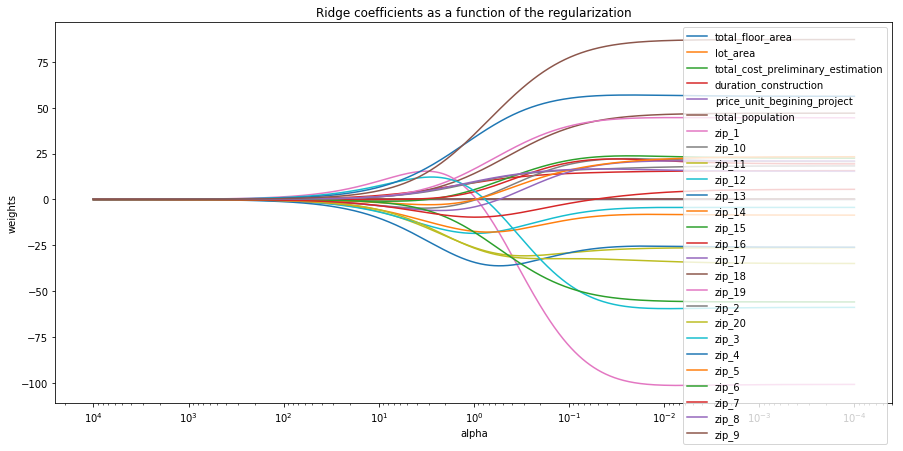

In [52]:
plt.figure(figsize=(15,7))
ax = plt.gca() # get current axis
plt.plot(alphas, np.squeeze(coefs))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(indep_vars)

¿Cuáles son las variables mas importantes?

Vamos ahora analizar los valores de r2 ajustado en los dataset de entrenamiento y test.

Creamos un array con los valores de las dos series uno a uno para poder plotearlos al mismo tiempo.

In [53]:
t1 = np.array(r2adj_train_vec)
t1 = t1[:, np.newaxis]
print("train: ", t1.shape)

t2 = np.array(r2adj_test_vec)
t2 = t2[:, np.newaxis]
print("test: ", t2.shape)

r2adj_vecs = np.concatenate((t1, t2), axis=1)
print("concatenación: ", r2adj_vecs.shape)

train:  (1000, 1)
test:  (1000, 1)
concatenación:  (1000, 2)


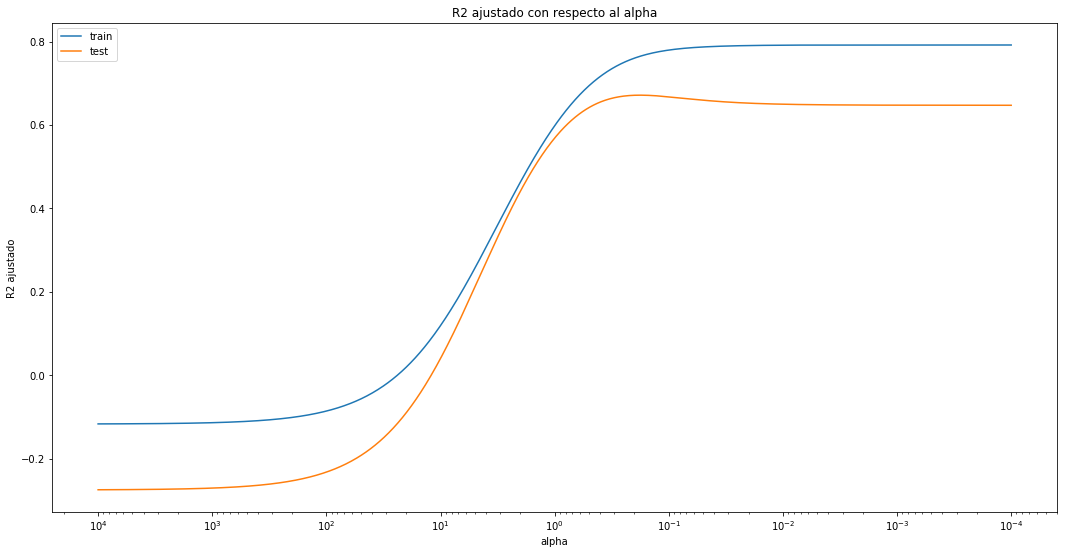

In [45]:
plt.figure(figsize=(18,9))
ax = plt.gca()
plt.plot(alphas, r2adj_vecs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('R2 ajustado')
plt.title('R2 ajustado con respecto al alpha')
plt.legend(['train', 'test'])

Encontramos que para un valor de alpha un poco por debajo de 0.2, se obtiene el valor máximal de R2 ajustado para el conjunto de test.
Vamos a utilizar CV para comparar valores de alpha cercanos. 

In [46]:
indiceMax = np.argmax(r2adj_test_vec)
r2Max = r2adj_test_vec[indiceMax]
alphaMax = alphas[indiceMax]
print("El nivel máximo de R2 es {}, y se alcanza con un alpha de {}".format(r2Max, alphaMax))

El nivel máximo de R2 es 0.6713999902490587, y se alcanza con un alpha de 0.1783410220710008


In [47]:
ridgereg = Ridge(alpha=alphaMax, normalize=True)
ridgereg.fit(train_X, train_y)

train_y_pred = ridgereg.predict(train_X)
test_y_pred = ridgereg.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 5367.8267
MSE (test) : 7270.9156
R2  (train): 0.7894
R2  (test) : 0.7414
R2 adj (train): 0.7647
R2 adj (test): 0.6714


Con Ridge regression podemos llegar hasta a un valor de R2 ajustado de 0.6714 y un MSE de 7270.

## Lasso regression

Vamos ahora utilizar la regularización del modelo de Lasso. Utilizamos un valor de alpha específico (1).

In [54]:
lassoreg = Lasso(alpha=1.0, normalize=True)
lassoreg.fit(train_X, train_y)

train_y_pred = lassoreg.predict(train_X)
test_y_pred = lassoreg.predict(test_X)
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 8024.4537
MSE (test) : 7143.2000
R2  (train): 0.6851
R2  (test) : 0.7460
R2 adj (train): 0.6482
R2 adj (test): 0.6772


Noten como se mejora el valor de las métricas para el conjunto de test:
- Con el modelo de regresión lineal teníamos un valor de R2 ajustado de 0.6471 y un MSE de 7807
- Con Ridge regression pasamos a un valor de R2 ajustado de 0.6714 y un MSE de 7270
- Con Lasso regression llegamos a un valor de R2 ajustado de 0.6772 y un MSE de 7143

In [55]:
lassoreg.coef_

array([-0.00000000e+00, -3.61884863e-03,  9.22729303e-02,  8.08859054e+00,
        8.66152409e-02,  1.88856492e-04, -1.20130404e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.41442441e+01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

Vemos que con el valor del alpha dado, varios de los parámetros dejan de ser considerados (coeficientes en 0).

### Análisis de los modelos para diferentes grados de penalización

Se va a controlar el parámetro *alpha* que controla el componente de penalización de la complejidad de los modelos de Lasso regression.
Se crea un conjunto de valores de *alpha* siguiendo una escala logarítmica que se van a utilizar para analizar como varían los coeficientes.

In [67]:
n_alphas = 200
alphas = np.logspace(-1, 1, n_alphas)

Vamos a recorrer el array de valores de alpha, y vamos a aprender un modelo de Ridge para configuración, guardando en el array *coef* los coeficientes de las variables independientes de cada modelo.

In [68]:
coefs = []
r2adj_train_vec = []
r2adj_test_vec = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True, normalize=True)
    lasso.fit(train_X, train_y)
    coefs.append(lasso.coef_)
    train_y_pred = lasso.predict(train_X)
    test_y_pred = lasso.predict(test_X)
    r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
    r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
    r2adj_train_vec.append(r2_aj_train)
    r2adj_test_vec.append(r2_aj_test)

Vamos ahora a plotear los valores de las métricas con respecto al valor del alpha.

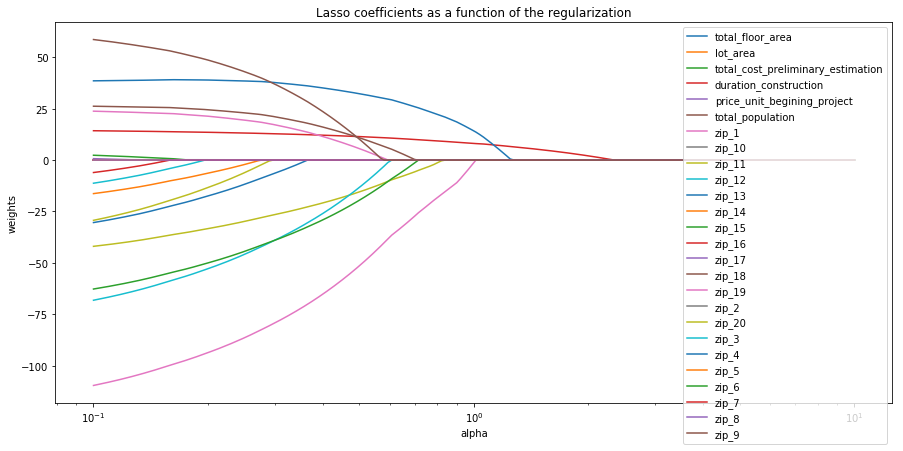

In [69]:
plt.figure(figsize=(15,7))
ax = plt.gca()
plt.plot(alphas, np.squeeze(coefs))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.legend(indep_vars)

Vemos cómo para valores muy negativos de alpha tenemos que la mayoría de coeficientes son diferentes de 0:

In [70]:
coefs[0]

array([-2.07289869e-02, -0.00000000e+00,  1.81311567e-01,  1.42753301e+01,
        1.01263893e-01,  5.17752726e-04, -1.09678727e+02,  0.00000000e+00,
       -2.93210847e+01, -1.12617022e+01, -3.04146143e+01, -1.63237973e+01,
        2.34956278e+00,  0.00000000e+00,  6.84023476e-01,  2.62033463e+01,
        2.37919741e+01,  0.00000000e+00, -4.19729472e+01, -6.82108061e+01,
        3.85580953e+01,  0.00000000e+00, -6.27497481e+01, -6.06328133e+00,
        0.00000000e+00,  5.86517923e+01])

Y para valores elevados de alpha, muy pocas variables independientes siguen siendo consideradas

In [72]:
coefs[150]

array([ 0.        , -0.        ,  0.0558923 ,  0.        ,  0.06095683,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ])

In [73]:
train_X.columns

Index(['total_floor_area', 'lot_area', 'total_cost_preliminary_estimation',
       'duration_construction', 'price_unit_begining_project',
       'total_population', 'zip_1', 'zip_10', 'zip_11', 'zip_12', 'zip_13',
       'zip_14', 'zip_15', 'zip_16', 'zip_17', 'zip_18', 'zip_19', 'zip_2',
       'zip_20', 'zip_3', 'zip_4', 'zip_5', 'zip_6', 'zip_7', 'zip_8',
       'zip_9'],
      dtype='object')

In [74]:
alphas[150]

3.217641750250737

Tenemos sólo total_cost_preliminary_estimation y price_unit_begining_project intervienen en el modelo con un valor de alpha de 3.217.

Vamos ahora a buscar cual es mejor valor de alpha, analizando los valores de r2 ajustado en los dataset de entrenamiento y test.
Creamos un array con los valores de las dos series uno a uno para poder plotearlos al mismo tiempo.

In [75]:
t1 = np.array(r2adj_train_vec)
t1 = t1[:, np.newaxis]
print("train: ", t1.shape)

t2 = np.array(r2adj_test_vec)
t2 = t2[:, np.newaxis]
print("test: ", t2.shape)

r2adj_vecs = np.concatenate((t1, t2), axis=1)
print("concatenación: ", r2adj_vecs.shape)

train:  (200, 1)
test:  (200, 1)
concatenación:  (200, 2)


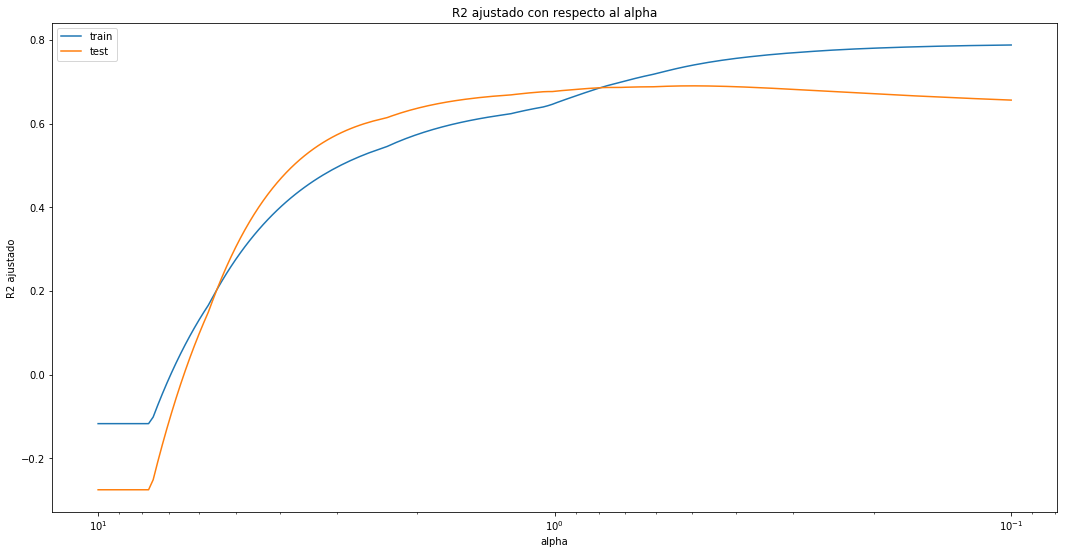

In [76]:
plt.figure(figsize=(18,9))
ax = plt.gca()
plt.plot(alphas, r2adj_vecs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('R2 ajustado')
plt.title('R2 ajustado con respecto al alpha')
plt.legend(['train', 'test'])

Encontramos que para un valor de alpha alrededor de 0.5 se obtiene el valor máximal de R2 ajustado para el conjunto de test.
Vamos a utilizar CV para comparar valores de alpha cercanos. 

In [78]:
indiceMax = np.argmax(r2adj_test_vec)
r2Max = r2adj_test_vec[indiceMax]
alphaMax = alphas[indiceMax]
print("El nivel máximo de R2 es {}, y se alcanza con un alpha de {}".format(r2Max, alphaMax))

El nivel máximo de R2 es 0.6901716435061457, y se alcanza con un alpha de 0.5052631065335681


In [79]:
lassoreg = Lasso(alpha=alphaMax, normalize=True)
lassoreg.fit(train_X, train_y)

train_y_pred = lassoreg.predict(train_X)
test_y_pred = lassoreg.predict(test_X)
train_y_pred[0:5]
print("MSE (train): %.4f" % mean_squared_error(train_y, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(test_y, test_y_pred))
print('R2  (train): %.4f' % r2_score(train_y, train_y_pred))
print('R2  (test) : %.4f' % r2_score(test_y, test_y_pred))
r2_aj_train = 1 - (1-r2_score(train_y, train_y_pred))*(len(train_y)-1) / (len(train_y) - train_X.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_X.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

MSE (train): 5969.6925
MSE (test) : 6855.5562
R2  (train): 0.7657
R2  (test) : 0.7562
R2 adj (train): 0.7383
R2 adj (test): 0.6902


Con Lasso regression podemos llegar hasta a un valor de R2 ajustado de 0.6902 y un MSE de 6853.